<a href="https://colab.research.google.com/github/kimsijin33/-AI-/blob/main/%EC%A0%88%EB%8B%A8%EB%90%9C_SVD%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%95%95%EC%B6%95%ED%95%98%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving fastcampus.jpg to fastcampus (1).jpg


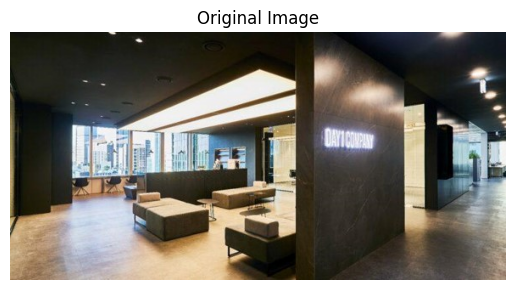

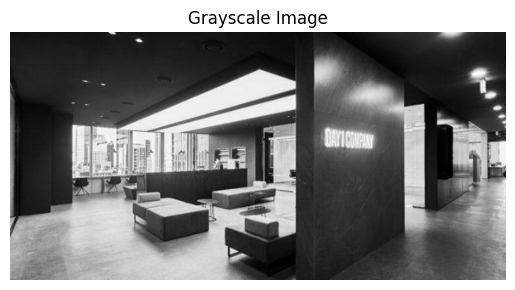

In [ ]:
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from google.colab import files

# 업로드 창을 열어 이미지 업로드
uploaded = files.upload()

# 업로드한 파일 이름 추출
filename = list(uploaded.keys())[0]

# 이미지 열기
img = Image.open(filename)

# 원본 이미지 출력
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# 회색조로 변환 ('L'은 grayscale, 'LA'는 alpha 채널 포함한 grayscale)
img_gray = img.convert('LA')

# 변환된 이미지 출력
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

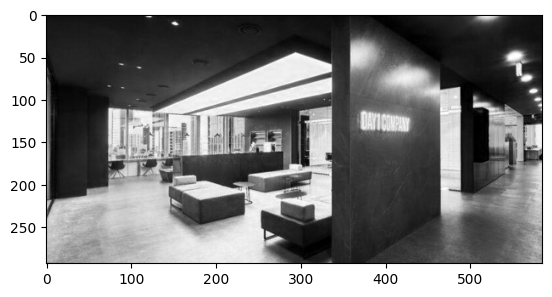

In [ ]:
import numpy as np

img_np = np.array(list(img.getdata(band=0)), float)
img_np.shape = (img.size[1], img.size[0])
img_np = np.matrix(img_np)

plt.imshow(img_np, cmap='gray') # 원본 이미지와 동일

In [ ]:
print(img_np.shape) # 이미지 행렬

(293, 585)


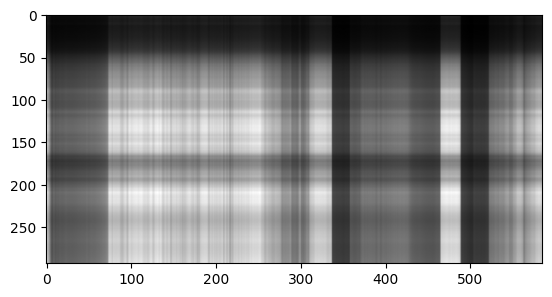

In [ ]:
U, S, V = np.linalg.svd(img_np) # 특이값 분해

img_svd = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(V[:1, :])

plt.imshow(img_svd, cmap='gray')

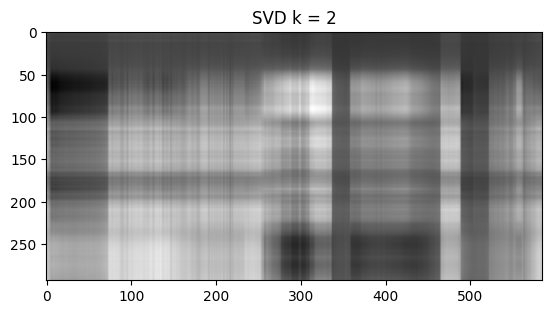

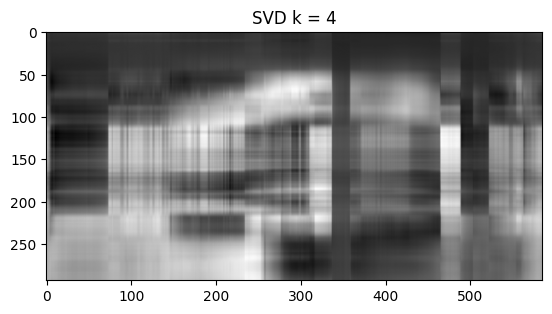

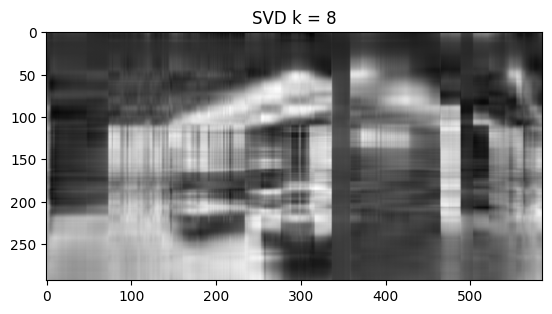

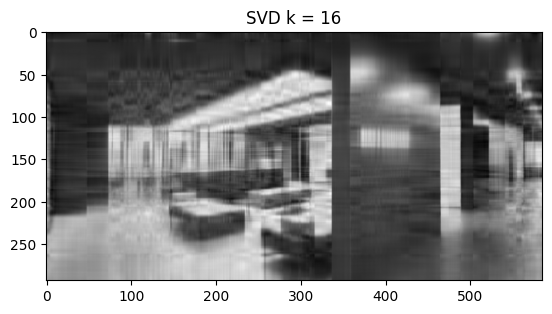

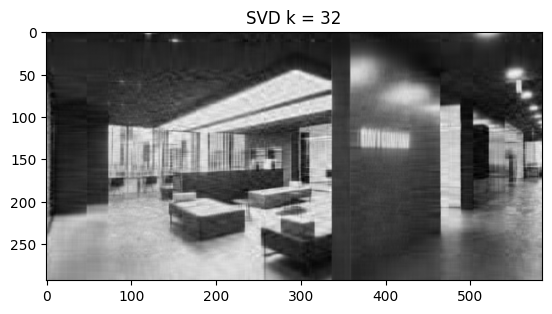

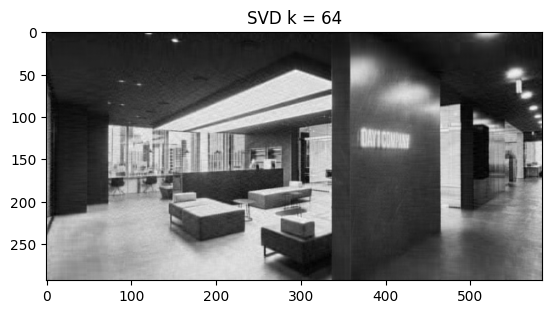

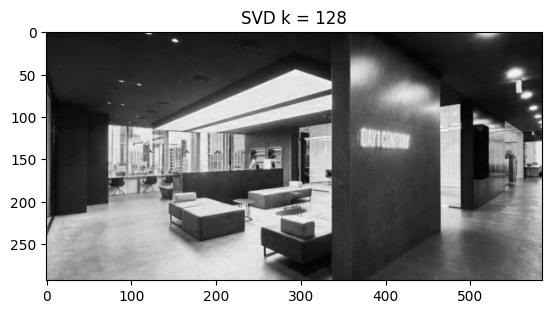

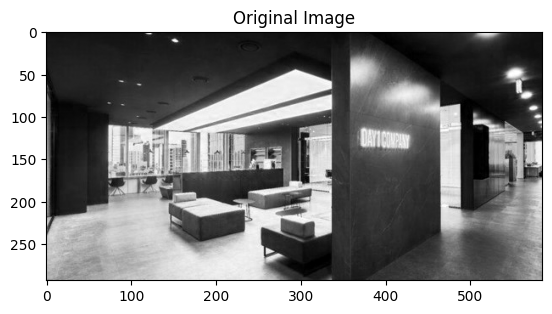

In [ ]:
for k in [2, 4, 8, 16, 32, 64, 128]:
    img_svd = np.matrix(U[:, :k] * np.diag(S[:k]) * np.matrix(V[:k, :]))
    plt.imshow(img_svd, cmap='gray')
    title = "SVD k = %s" % k
    plt.title(title)
    plt.show() # SVD 결과 이미지

plt.imshow(img_np, cmap='gray')
plt.title('Original Image')
plt.show() # 원본 이미지
